In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load Iris Data

In [2]:
iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=iris['target']

In [3]:
#take only 2 classes
X=X[:100]
y=y[:100]
X.shape,y.shape

((100, 2), (100,))

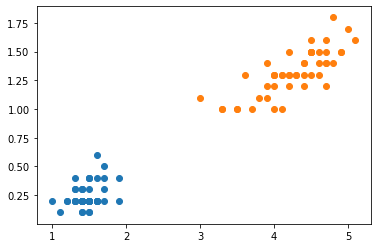

In [4]:
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])

# Train a LinearSVC, SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [5]:
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

linear_svc=LinearSVC()
svc=SVC(kernel='linear')
sgd_model=SGDClassifier()

scale=StandardScaler()

X=scale.fit_transform(X)

linear_svc.fit(X,y)
svc.fit(X,y)
sgd_model.fit(X,y)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
w1=linear_svc.coef_[0,0]/linear_svc.coef_[0,1]
b1=linear_svc.intercept_[0]/linear_svc.coef_[0,1]

w2=svc.coef_[0,0]/svc.coef_[0,1]
b2=svc.intercept_[0]/svc.coef_[0,1]

w3=sgd_model.coef_[0,0]/sgd_model.coef_[0,1]
b3=sgd_model.intercept_[0]/sgd_model.coef_[0,1]

In [7]:
# Transform the decision boundary lines back to the original scale
line1 = scale.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scale.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scale.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

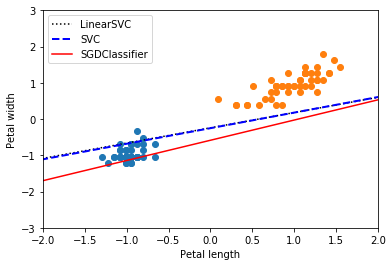

In [8]:
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([-2,2,-3,3])
plt.legend()

plt.show()



# Train SVC Model on SVC

In [9]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
print(mnist.keys())
from sklearn.model_selection import GridSearchCV

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [10]:
mnist['DESCR']
X,y=mnist['data'],mnist['target']
print(X.shape,y.shape)

X=X/255.0

(70000, 784) (70000,)


In [16]:
parameters=[{   'C':[1,2,3,4,5],
                'kernel':['linear','poly','rbf','sigmoid'],
                'gamma':np.arange(0.001, 0.1)
            }]
model=GridSearchCV(svc,param_grid=parameters,cv=5,n_jobs=-1,verbose=2)

In [18]:
model.fit(X[:5000],y[:5000])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5], 'gamma': array([0.001]),
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [19]:
model.best_params_

{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}

In [20]:
model.best_score_

0.9204009138148361

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearch
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print("RMSE=",np.sqrt(mse))

RMSE= 0.5797673265358964


# GridSearch on Housing Data

In [28]:
cal_model=GridSearchCV(svr,param_grid=parameters,cv=5,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')
cal_model.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5], 'gamma': array([0.001]),
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
print("RMSE=",np.sqrt(-cal_model.best_score_))

RMSE= 0.7185538637839307


# Test results

In [34]:
y_pred = cal_model.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE=",np.sqrt(mse))

Test RMSE= 0.7357713724581748
